In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('d:churn_modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['CustomerId'].duplicated().sum()

0

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df=df.drop(columns=['RowNumber','Surname'],axis='columns')

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['CustomerId'] = df['CustomerId'] / 10000000

In [10]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.563460,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1.564731,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,1.561930,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,1.570135,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,1.573789,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.shape

(10000, 12)

In [12]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df['CreditScore'].duplicated().sum()

9540

In [14]:
df.dtypes

CustomerId         float64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [16]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [17]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [18]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']


In [19]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.563460,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,1.564731,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,1.561930,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,1.570135,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,1.573789,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


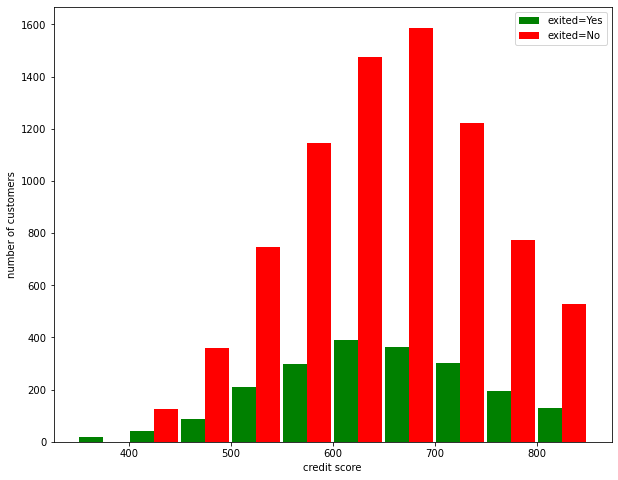

In [20]:
exited_no = df[df.Exited ==0].CreditScore
exited_yes = df[df.Exited==1].CreditScore

plt.figure(figsize=(10,8))
plt.xlabel('credit score')
plt.ylabel('number of customers')
plt.hist([exited_yes ,exited_no], rwidth=0.95, color=['green','red'],label=['exited=Yes','exited=No'])
plt.legend()

In [21]:
df.dtypes

CustomerId         float64
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
df2=pd.get_dummies(data=df,columns=['Geography'],drop_first=True)

In [23]:
df2

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1.563460,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,1.564731,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,1.561930,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,1.570135,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,1.573789,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.560623,771,0,39,5,0.00,2,1,0,96270.64,0,0,0
9996,1.556989,516,0,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,1.558453,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,1.568235,772,0,42,3,75075.31,2,1,0,92888.52,1,1,0


In [24]:
df2.dtypes

CustomerId           float64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [25]:
df2['Balance'].isnull().sum()

0

In [26]:
df2['CreditScore'] = df2['CreditScore'] / 1000

In [27]:
df2['Age'] = df2['Age'] / 100

In [28]:
df2

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1.563460,0.619,1,0.42,2,0.00,1,1,1,101348.88,1,0,0
1,1.564731,0.608,1,0.41,1,83807.86,1,0,1,112542.58,0,0,1
2,1.561930,0.502,1,0.42,8,159660.80,3,1,0,113931.57,1,0,0
3,1.570135,0.699,1,0.39,1,0.00,2,0,0,93826.63,0,0,0
4,1.573789,0.850,1,0.43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.560623,0.771,0,0.39,5,0.00,2,1,0,96270.64,0,0,0
9996,1.556989,0.516,0,0.35,10,57369.61,1,1,1,101699.77,0,0,0
9997,1.558453,0.709,1,0.36,7,0.00,1,0,1,42085.58,1,0,0
9998,1.568235,0.772,0,0.42,3,75075.31,2,1,0,92888.52,1,1,0


In [29]:
df2[['Balance','Tenure','NumOfProducts','EstimatedSalary']]=df2[['Balance','Tenure','NumOfProducts','EstimatedSalary']].astype('float')

In [30]:
df2

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1.563460,0.619,1,0.42,2.0,0.00,1.0,1,1,101348.88,1,0,0
1,1.564731,0.608,1,0.41,1.0,83807.86,1.0,0,1,112542.58,0,0,1
2,1.561930,0.502,1,0.42,8.0,159660.80,3.0,1,0,113931.57,1,0,0
3,1.570135,0.699,1,0.39,1.0,0.00,2.0,0,0,93826.63,0,0,0
4,1.573789,0.850,1,0.43,2.0,125510.82,1.0,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.560623,0.771,0,0.39,5.0,0.00,2.0,1,0,96270.64,0,0,0
9996,1.556989,0.516,0,0.35,10.0,57369.61,1.0,1,1,101699.77,0,0,0
9997,1.558453,0.709,1,0.36,7.0,0.00,1.0,0,1,42085.58,1,0,0
9998,1.568235,0.772,0,0.42,3.0,75075.31,2.0,1,0,92888.52,1,1,0


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale=['Balance','Tenure','NumOfProducts','EstimatedSalary']
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

d:\Users\Public\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
df2

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1.563460,0.619,1,0.42,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,1.564731,0.608,1,0.41,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,1.561930,0.502,1,0.42,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,1.570135,0.699,1,0.39,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.573789,0.850,1,0.43,0.2,0.500246,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.560623,0.771,0,0.39,0.5,0.000000,0.333333,1,0,0.481341,0,0,0
9996,1.556989,0.516,0,0.35,1.0,0.228657,0.000000,1,1,0.508490,0,0,0
9997,1.558453,0.709,1,0.36,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,1.568235,0.772,0,0.42,0.3,0.299226,0.333333,1,0,0.464429,1,1,0


In [33]:
x=df2.drop(['Exited'],axis='columns')
y=df2['Exited']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [35]:
x_train.shape

(8000, 12)

In [36]:
x_test.shape

(2000, 12)

In [37]:
y_train.shape

(8000,)

In [38]:
x_train[:5]

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9254,1.560112,0.686,0,0.32,0.6,0.000000,0.333333,1,1,0.895494,0,0
1561,1.576637,0.632,0,0.42,0.4,0.476786,0.333333,1,1,0.979930,1,0
1670,1.571699,0.559,0,0.24,0.3,0.457317,0.000000,1,0,0.429438,0,1
6087,1.573076,0.561,1,0.27,0.9,0.540606,0.000000,1,0,0.765417,0,0
6669,1.579790,0.517,0,0.56,0.9,0.566554,0.000000,0,0,0.197401,0,0


In [39]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [43]:
def ANN(x_train , y_train ,loss ):
    model =keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss=loss ,metrics=['accuracy'] )
    model.fit(x_train, y_train,epochs=100)
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds
    


In [45]:
y_preds = ANN(x_train , y_train , 'binary_crossentropy')

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.4973 - accuracy: 0.7843
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4575 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.8024
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8234
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8331
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8424
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.8481
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.8453
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8495
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3585 - accura

# under sampling

In [47]:
value_0 , value_1 = df2['Exited'].value_counts()

In [48]:
value_0 , value_1

(7963, 2037)

In [49]:
sample_0 = df2[df2['Exited'] == 0]
sample_1 = df2[df2['Exited'] ==1]

In [51]:
sample_0.shape , sample_1.shape

((7963, 13), (2037, 13))

In [52]:
sample_0_under = sample_0.sample(value_1)

In [53]:
sample_0_under.shape

(2037, 13)

In [54]:
under_sample = pd.concat([sample_0_under , sample_1],axis=0)

In [55]:
x = under_sample.drop('Exited',axis=1)
y = under_sample['Exited']

In [56]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

In [57]:
y_preds = ANN(x_train , y_train , 'binary_crossentropy')

Epoch 1/100
102/102 [==============================] - 3s 4ms/step - loss: 0.6751 - accuracy: 0.5947
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.6459
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6689
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.6723
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.6797
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.6953
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.6962
Epoch 8/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7017
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5773 - accuracy: 0.7116
Epoch 10/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5778 - accura

## oversampling

In [59]:
sample_0.shape

(7963, 13)

In [61]:
sample_1_over = sample_1.sample(value_0,replace=True)

In [62]:
sample_over  = pd.concat([sample_0 , sample_1_over],axis=0)

In [63]:
sample_over.shape

(15926, 13)

In [64]:
x = sample_over.drop('Exited',axis=1)
y =sample_over['Exited']

In [65]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

In [66]:
y_preds = ANN(x_train , y_train , 'binary_crossentropy')

Epoch 1/100
399/399 [==============================] - 3s 5ms/step - loss: 0.6092 - accuracy: 0.6699
Epoch 2/100
399/399 [==============================] - 1s 4ms/step - loss: 0.5437 - accuracy: 0.7256
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4968 - accuracy: 0.7540
Epoch 4/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4819 - accuracy: 0.7633
Epoch 5/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4791 - accuracy: 0.7666
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4758 - accuracy: 0.7644
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4734 - accuracy: 0.7682
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7704
Epoch 9/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4675 - accuracy: 0.7721
Epoch 10/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4649 - accura

In [67]:
from imblearn.over_sampling import SMOTE

In [70]:
x = df2.drop('Exited',axis = 1)
y = df2['Exited']

In [73]:
x.shape , y.shape

((10000, 12), (10000,))

In [68]:
smote = SMOTE(sampling_strategy='minority')

In [71]:
x_s , y_s =smote.fit_resample(x,y)

In [74]:
x_train , x_test ,y_train ,y_test = train_test_split(x_s,y_s,random_state=42,test_size=0.2)

In [75]:
y_preds = ANN(x_train , y_train , 'binary_crossentropy')

Epoch 1/100
399/399 [==============================] - 3s 3ms/step - loss: 0.6132 - accuracy: 0.6633
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5559 - accuracy: 0.7196
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4922 - accuracy: 0.7627
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4799 - accuracy: 0.7671
Epoch 5/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4725 - accuracy: 0.7674
Epoch 6/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4760 - accuracy: 0.7682
Epoch 7/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4680 - accuracy: 0.7706
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4690 - accuracy: 0.7735
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4648 - accuracy: 0.7735
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4693 - accura